# Exercise 3

Work on this before the next lecture on 1 May. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

Finding analytic gradients of expressions. Use the backprop framework we built in the lecture to compute the analytic gradient of an expression. This is useful to get thinking about
writing computations as graphs and to see first hand that there is no magic involved
in automatically finding derivatives.

For example, using the expression: $f(x) = \sin(x^2)$: implement a module for $\sin(x)$, build the graph representing the function, plot the expression as well as the gradient as a function of $x$.

* add a new operation (e.g. $\sin, \cos, \exp, x^y$, ...) to the `Addition` and `Multiply` modules.
* build a new expression using the available expressions
* plot your expression as well as its gradient
* compare the gradient to one you worked out by hand (or some other software package)

ps. if you want to use automatic differentiation for serious projects outside of neural
network projects checkout packages like https://github.com/HIPS/autograd

In [2]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dLdz):
        dzdx = self.y
        dLdx = dLdz * dzdx
        
        dzdy = self.x
        dLdy = dLdz * dzdy
        return [dLdx, dLdy]


class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
        
    def backward(self, dLdz):
        dzdy = 1
        dzdx = 1
        return [dLdz * dzdy, dLdz * dzdx]

In [3]:
def f_with_gradients(x, y, z):
    q = Add()
    f = Multiply()
    
    q_out = q.forward(x, y)
    f_out = f.forward(q_out, z)
    
    grad_f = f.backward(1.)
    grad_q = q.backward(grad_f[0])

    gradients = [grad_q[0], grad_q[1], grad_f[1]]
    return f_out, gradients

f_with_gradients(3,2,2)

(10, [2.0, 2.0, 5.0])

In [4]:
# your solution here

class Power:
    def forward(self, x, p):
        self.x = x
        self.p = p
        return x**p
    
    def backward(self, dLdz):
        dzdx = self.p*self.x**(self.p-1)
        return dLdz * dzdx
        

class Sin:
    def forward(self, x):
        self.x = x
        return np.sin(x)
    
    def backward(self, dLdz):
        dzdx = np.cos(self.x)
        return dLdz*dzdx
    
class Cos:
    def forward(self, x):
        self.x = x
        return np.cos(x)
    
    def backward(self, dLdz):
        dzdx = -np.sin(self.x)
        return dLdz*dzdx
    
class Exp:
    def forward(self, x):
        self.x = x
        return np.exp(x)
    
    def backward(self, dLdz):
        dzdx = np.exp(self.x)
        return dLdz*dzdx
    
def sin_x_square(x):
    s = Sin()
    f = Power()
    
    f_out = f.forward(x,2)
    s_out = s.forward(f_out)
    
    grad_f = f.backward(1.)
    grad_s = s.backward(grad_f)
    
    return s_out,grad_s

class Addx:
    def forward(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        return x1 + x2
        
    def backward(self, x1_prime, x2_prime):
        dzdx1 = 1
        dzdx2 = 1
        return x1_prime * dzdx1 + x2_prime * dzdx2
    
class Multiplyx:
    def forward(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        return x1 * x2
    
    def backward(self, x1_prime, x2_prime):
        dzdx1 = self.x2
        dLdx1 = x1_prime * dzdx1
        
        dzdx2 = self.x1
        dLdx2 = x2_prime * dzdx2
        return dLdx1 + dLdx2


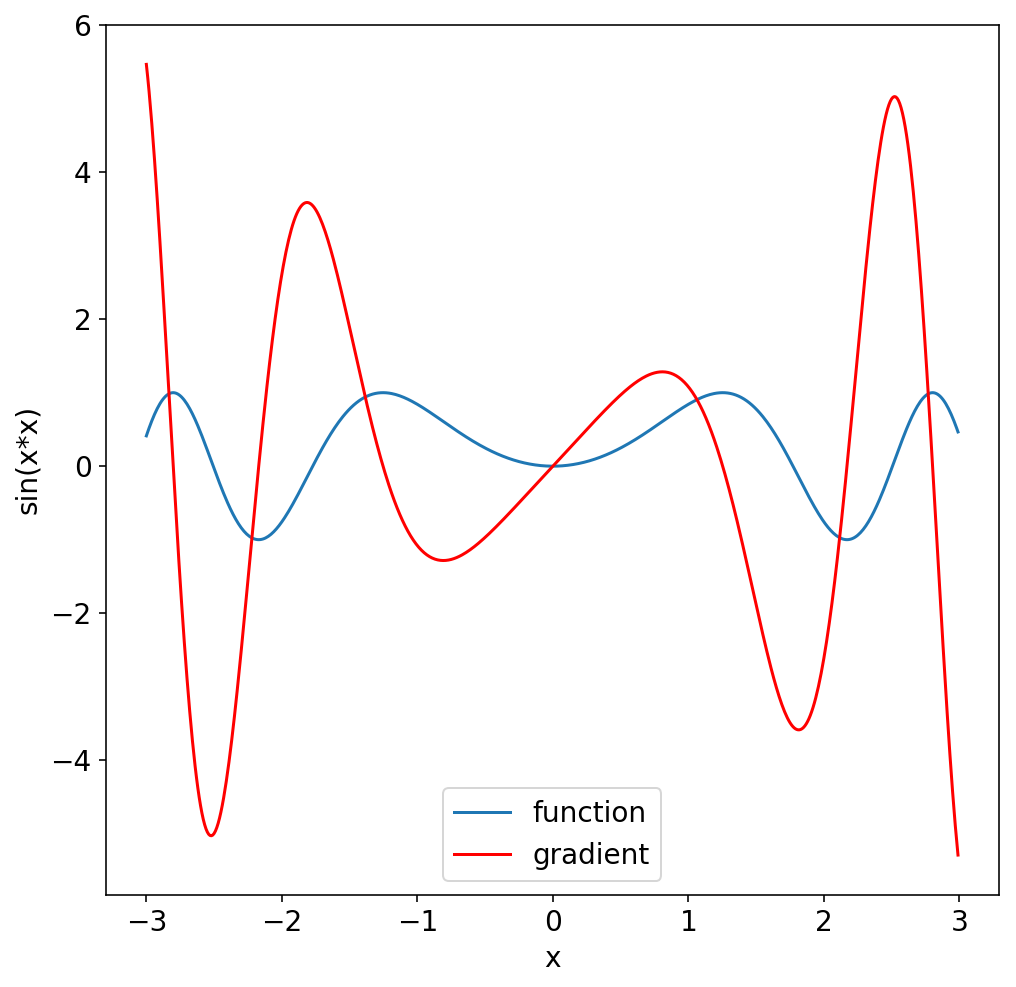

In [5]:
x = np.arange(-3, 3, 0.01)
s, g_s = sin_x_square(x)
plt.plot(x, s, label='function')
plt.plot(x, g_s, color='red', label='gradient')
plt.xlabel('x')
plt.ylabel('sin(x*x)')
plt.legend(loc='best')


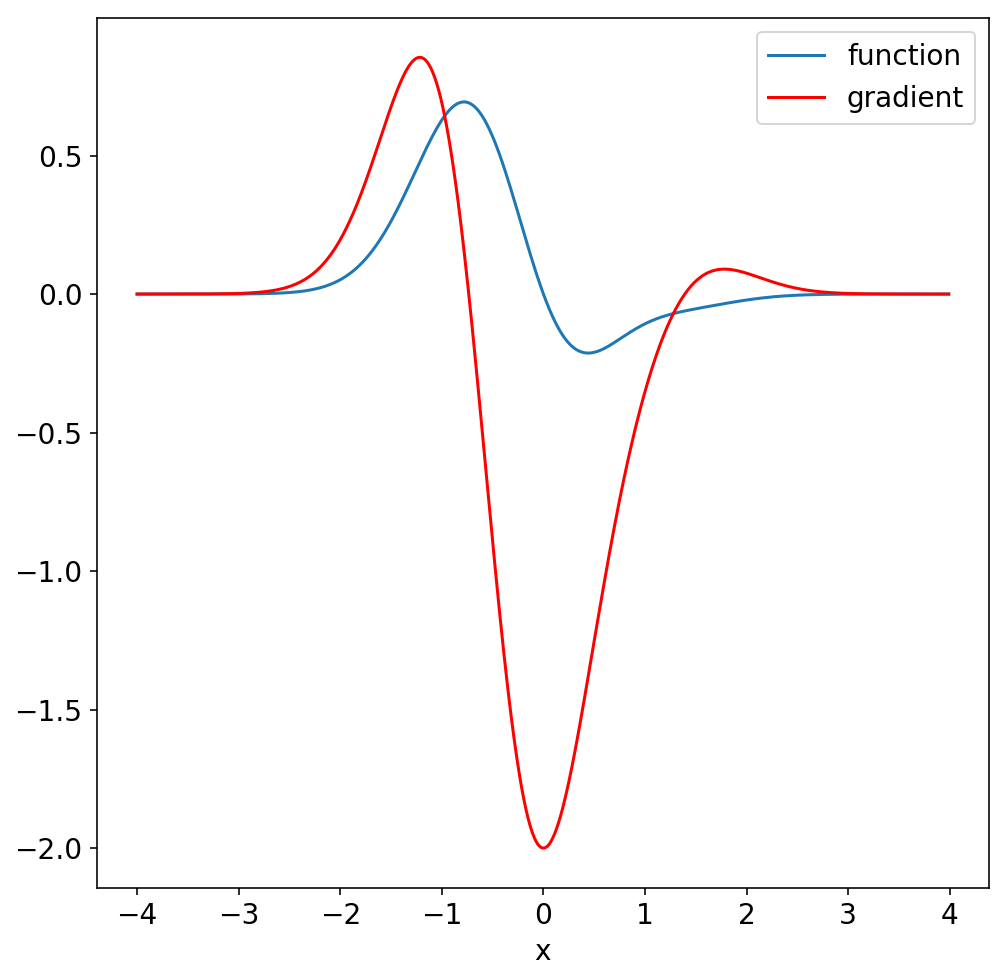

In [6]:
def Crazy_function(x):
    #f(x) = (sin(x)^2 - x)*exp(-x^2)
    
    s = Sin()
    s2 = Power()
    x2 = Power()
    a = Addx()
    e = Exp()
    m = Multiplyx()
    
    x2_out = x2.forward(x,2)
    e_out = e.forward(-x2_out)
    s_out = s.forward(x)
    s2_out = s2.forward(s_out,2)
    a_out = a.forward(s2_out,-x)
    m_out = m.forward(a_out,e_out)
    
    grad_x2 = x2.backward(1.)
    grad_e = e.backward(grad_x2)
    grad_s = s.backward(1.)
    grad_s2 = s.backward(grad_s)
    grad_a = a.backward(grad_s,1.0)
    grad_m = m.backward(grad_a,grad_e)
    
    return m_out, -grad_m

x = np.arange(-4, 4, 0.01)
f, g_f = Crazy_function(x)
plt.plot(x, f, label='function')
plt.plot(x, g_f, color='red', label='gradient')
plt.xlabel('x')
plt.legend(loc='best')
    

---

## Question 2

Use the circle data set from exercise 1 and build a neural network classifier that can solve the problem (scikit-learn provides a MLPClassifier classifier that implements a neural network). Comment on:

* what is the minimum number of layers
* what is the minimum width of each layer
* does the answer change if you provide polynomial features?
* thinking about how NNs distort and transform the problem space, can you create
  a visualisation of what it is the network is doing to make this problem linearly
  separable?
* is there a difference between using the tanh and ReLU activation functions?

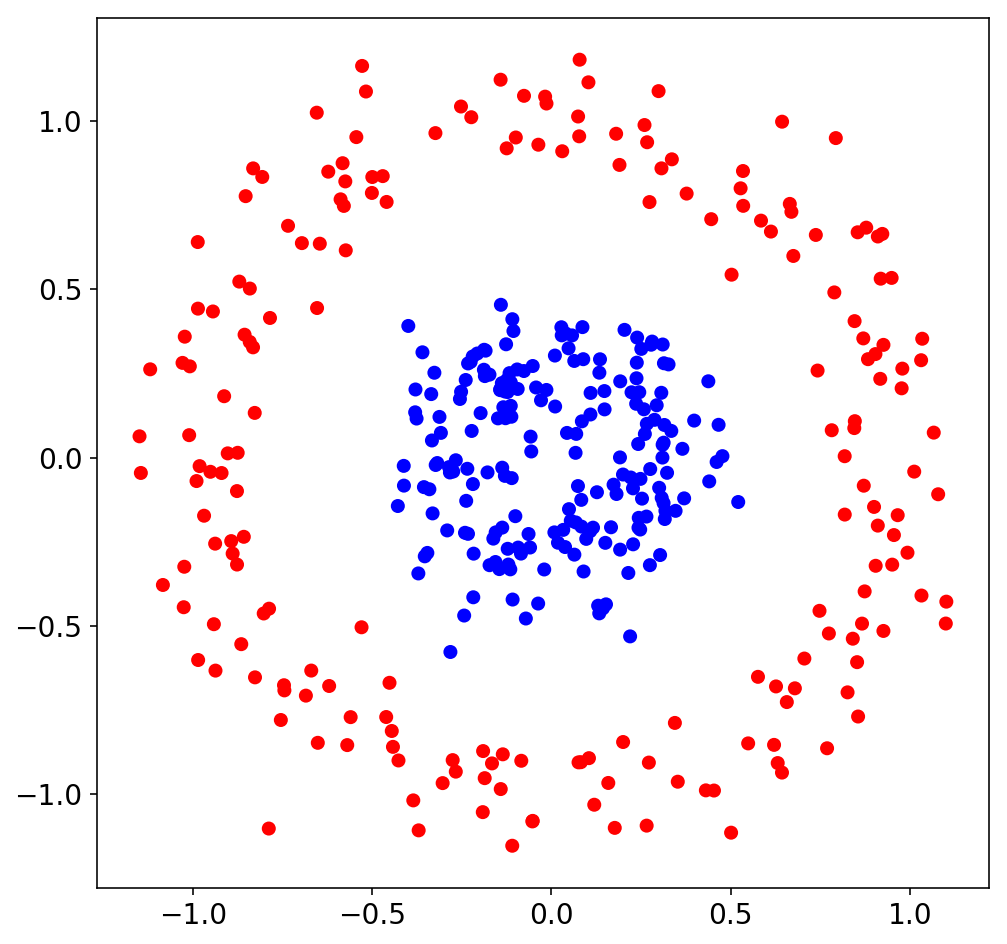

In [7]:
# your answer

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles
plt.rcParams["figure.figsize"] = (8, 8)

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

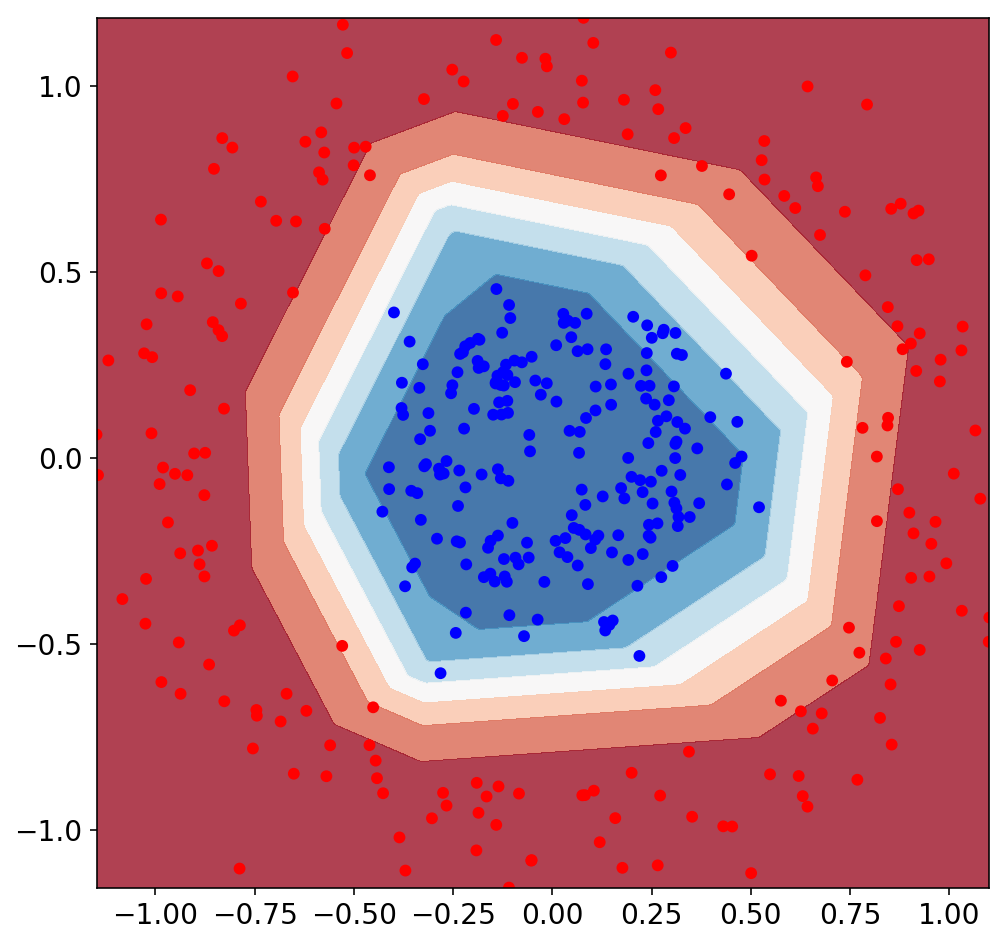

3


In [8]:
from utils import plot_surface
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=24)

clf = MLPClassifier(max_iter=5000,hidden_layer_sizes=(6))

clf.fit(X,y)

plot_surface(clf, X, y)

print(clf.n_layers_)


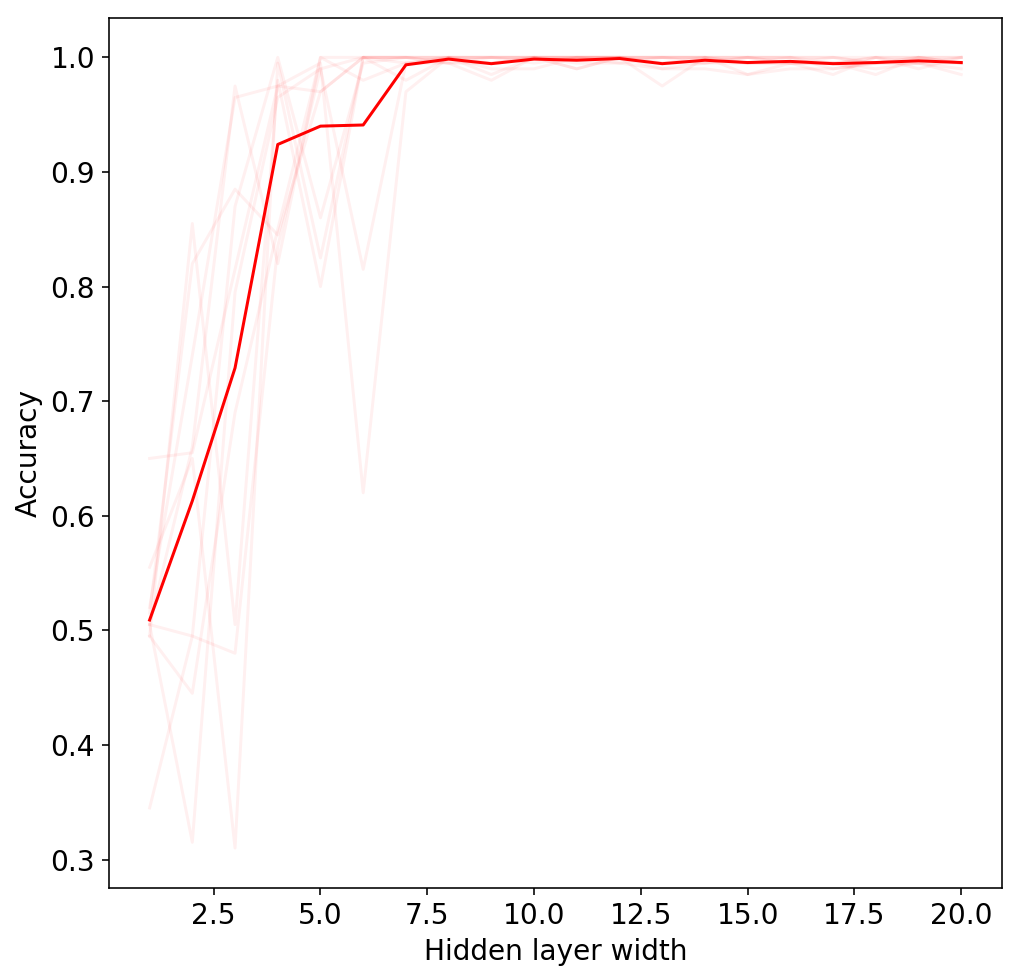

In [9]:
layer_size = np.arange(1, 21, 1)

scores = []

for n in range(10):
    score = []
    for l in layer_size:
        clf = MLPClassifier(hidden_layer_sizes=(l), 
                    max_iter=10000,
                    random_state=21+n)
        clf.fit(X_train,y_train)
        score.append( clf.score(X_test,y_test) )

    scores.append(score)
    
    plt.plot(layer_size, score, c='r', alpha=0.06)
    
    
plt.plot(layer_size, np.array(scores).mean(axis=0), c='r')
plt.xlabel('Hidden layer width')
plt.ylabel('Accuracy')

The number of max iterations has been increased because otherwise the optimization doesn't converge! The minimum number of layers is 3 according to the documentation in scikit (length = n_layers - 2). In order to obtain a good classification it seems that the minimal width of each layer should be 6. Let's check this if I provide polynomial features.

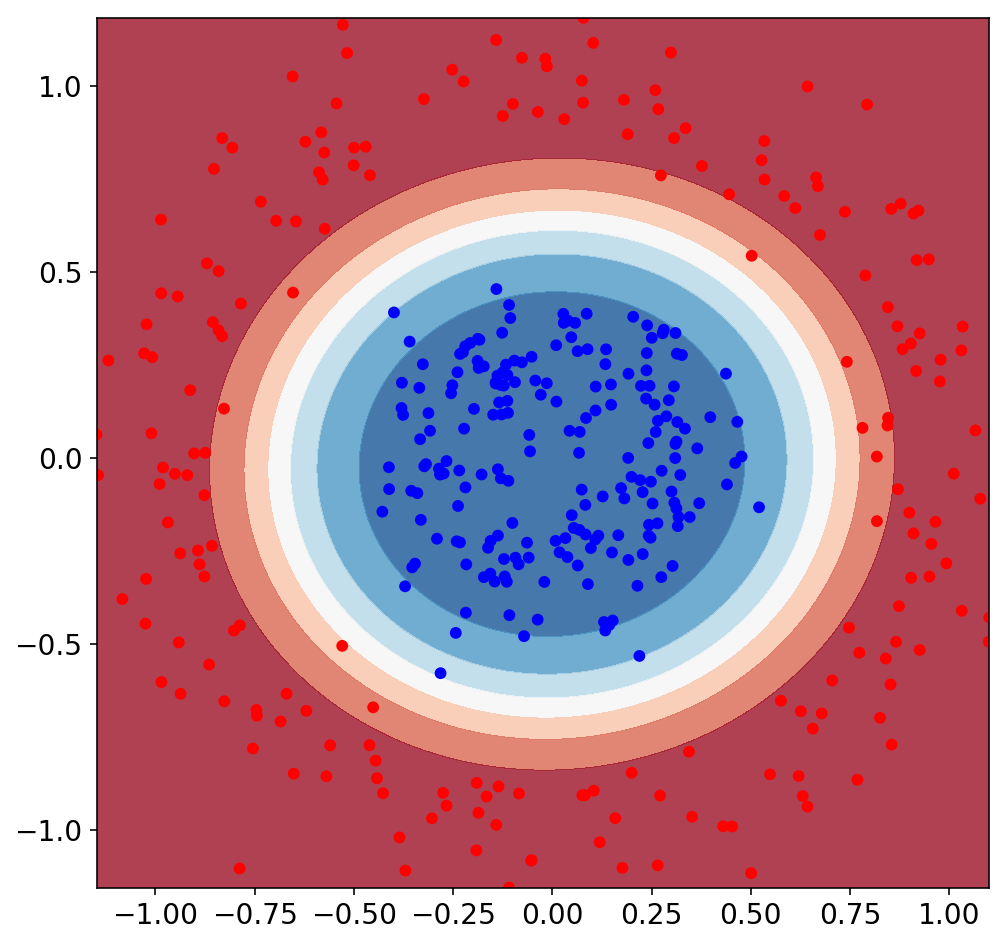

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

clf = MLPClassifier(max_iter=5000,hidden_layer_sizes=(1))
pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=2)),
                         ("NN", clf)])

pipeline.fit(X, y)
plot_surface(pipeline, X, y)



If I provide polynomial features I still have a minimum number of layer equal to 3 but I can go lower in the layer width down to 1.

Let's take a look a the activation function at each layer to see what the NN is doing to make the problem linaerly separable.



In [11]:
X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=18)

In [12]:
def compute_activations(mlp):
    # fit it first to populate the various attributes ...
    mlp.fit(X_train, y_train)

    # re-implement the forward pass logic from within the MLP class
    # so we can access the intermediate activations
    hidden_layer_sizes = mlp.hidden_layer_sizes
    hidden_layer_sizes = list(hidden_layer_sizes)
    layer_units = [X_test.shape[1]] + hidden_layer_sizes + [mlp.n_outputs_]

    activations = [X_test]
    for i in range(mlp.n_layers_ - 1):
        activations.append(np.empty((X.shape[0],
                                     layer_units[i + 1])))
    # forward pass
    mlp._forward_pass(activations)
    return activations

In [13]:
def plot_activations(activations):
    np.random.seed(123)
    hidden_layer = activations[-2]
    y_pred = activations[-1]

    fig, ax = plt.subplots(1, 3, figsize=(12,4))

    # input
    ax[0].scatter(X_train[:,0], X_train[:,1], c=y, lw=0.)
    ax[0].set_xlabel("Input feature")
    ax[0].set_ylabel('Dummy')
    ax[0].set_ylim([-3,3]);

    # hidden layer
    ax[1].scatter(hidden_layer[:,0], hidden_layer[:,1], c=y_test, lw=0)
    ax[1].set_xlabel('neuron 1')
    ax[1].set_ylabel('neuron 2')
    #ax[1].set_xlim([-1, 1])
    #ax[1].set_ylim([-1, 1])

    # output layer
    ax[2].scatter(activations[-1],  X_train[:,1], c=y_test, lw=0)
    ax[2].set_xlabel('network output')
    ax[2].set_ylabel('dummy')
    ax[2].set_xlim([0,1])
    ax[2].set_ylim([-3,3]);

    plt.tight_layout();
    plt.show()

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000,
                    solver='sgd', verbose=0, random_state=1,
                    learning_rate_init=0.02, activation='tanh')

In [15]:
def run(iteration=1, activation='tanh'):
    mlp.set_params(max_iter=iteration, activation=activation)

    activations4 = compute_activations(mlp)
    plot_activations(activations4)

In [16]:
from ipywidgets import interact    
interact(run, iteration=(1000, 1500, 10), activation=['tanh', 'identity', 'relu']);

Looking at the network output we see how the NN makes the problem linearly separable. It doesn't seem there is a big difference between using ReLu and tanh.

---

## Question 2.5

Use the spiral data set build a neural network classifier that can solve the problem (scikit-learn provides a MLPClassifier classifier that implements a neural network). Comment on:
* what is the minimum number of layers
* what is the minimum width of each layer
* is there a difference between using the tanh and ReLU activation functions?
* (bonus) build the same neural network using `keras` instead.
* (bonus) can you create a visualisation to show how the network transforms the problem? (Tim isn't sure this can be done, so don't spend forever on this.)

In [17]:
def make_spiral():
    N = 100 # number of points per class
    K = 3 # number of classes
    X = np.zeros((N*K, 2)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

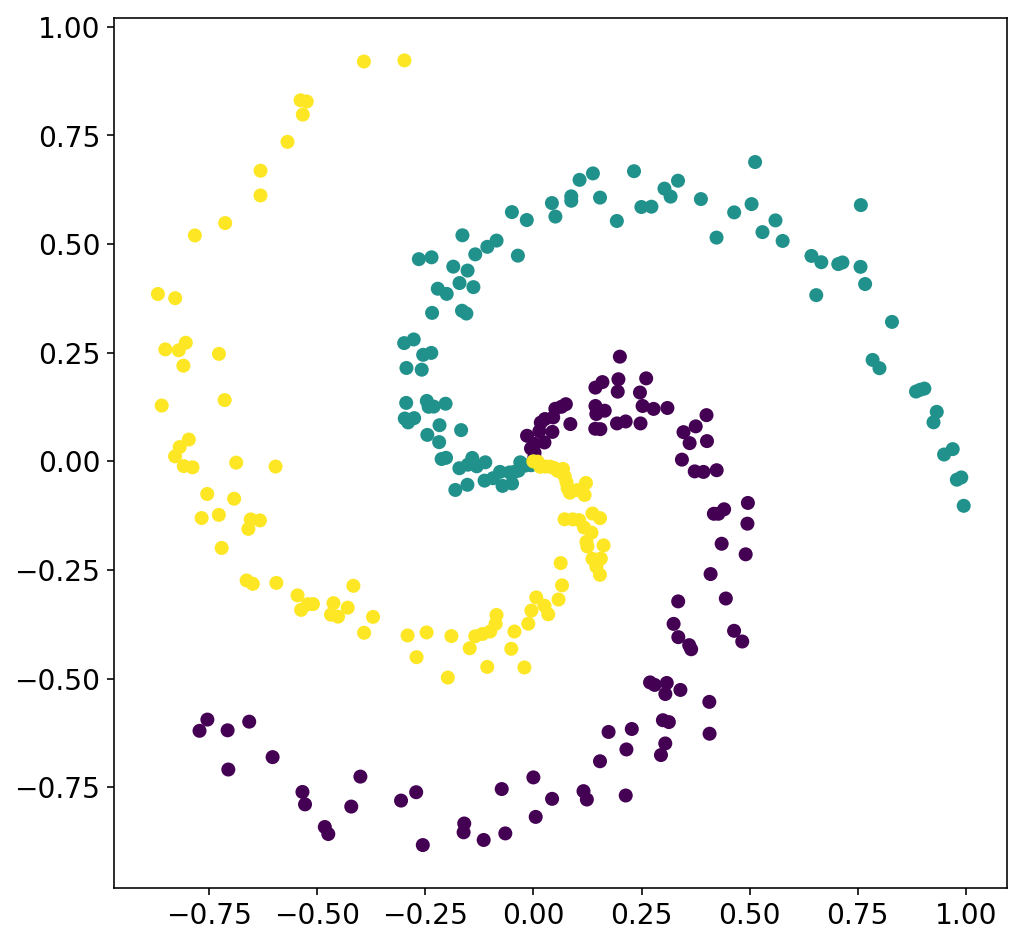

In [18]:
# your answer
X, y = make_spiral()

plt.scatter(X[:,0], X[:,1], c=y)

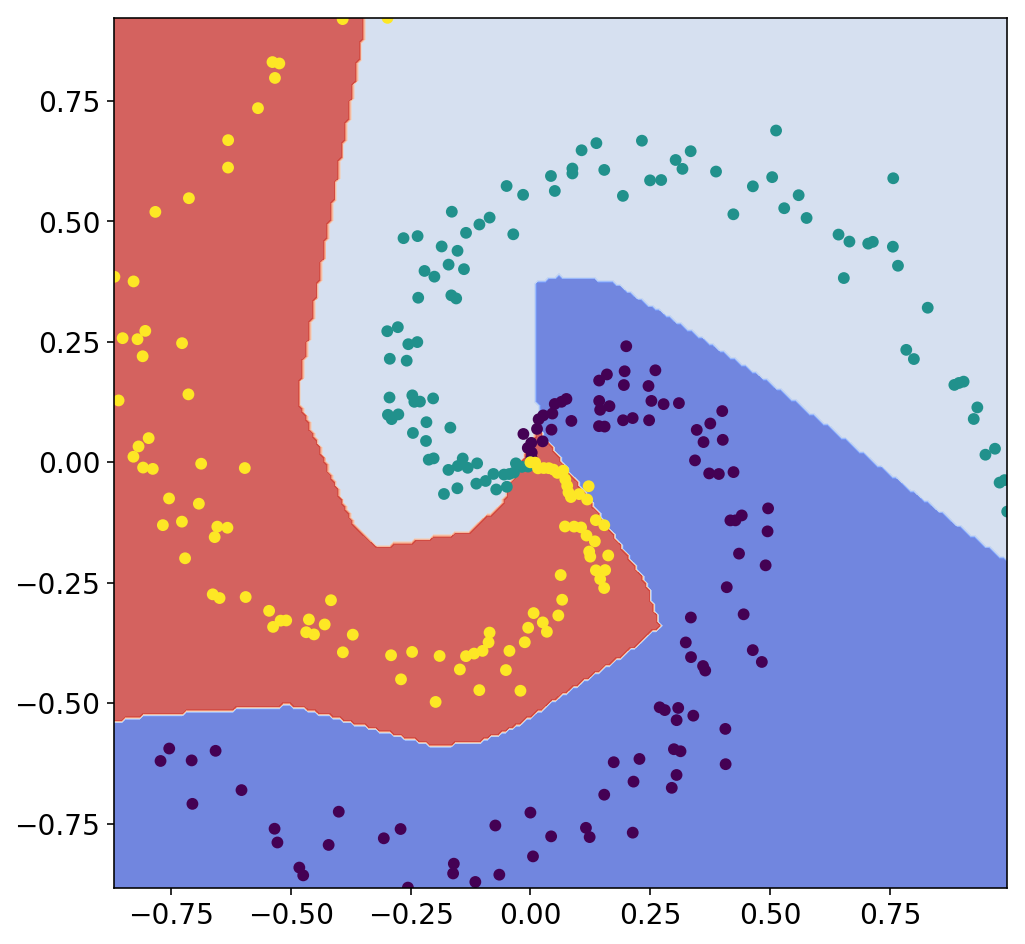

3


In [19]:
clf = MLPClassifier(max_iter=5000,hidden_layer_sizes=(20))

clf.fit(X, y)

plot_surface(clf, X, y,proba =False)

print(clf.n_layers_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=24)

layer_size = np.arange(1, 40, 1)

scores_ReLU = []
scores_TanH = []

for n in range(10):
    score_ReLU = []
    score_TanH = []
    for l in layer_size:
        clf = MLPClassifier(hidden_layer_sizes=(l), 
                    max_iter=10000,
                    random_state=21+n,activation='relu')
        clf.fit(X_train,y_train)
        score_ReLU.append( clf.score(X_test,y_test) )
        clf = MLPClassifier(hidden_layer_sizes=(l), 
                    max_iter=10000,
                    random_state=21+n,activation='tanh')
        clf.fit(X_train,y_train)
        score_TanH.append( clf.score(X_test,y_test) )

    scores_ReLU.append(score_ReLU)
    scores_TanH.append(score_TanH)
    
    plt.plot(layer_size, score_ReLU, c='r', alpha=0.06)
    plt.plot(layer_size, score_TanH, c='b', alpha=0.06)
    
    
plt.plot(layer_size, np.array(scores_ReLU).mean(axis=0), c='r' , label='Score Relu')
plt.plot(layer_size, np.array(scores_TanH).mean(axis=0), c='b' , label='Score Tanh')
plt.xlabel('Hidden layer width')
plt.ylabel('Accuracy')
plt.legend(loc='best')

For the spiral data we have 3 layers at minimum and at least a width of 20 in order to get good separation.

---

## Question 3

Build a fully connected neural network and a ConvNet to classify hand written digits.

scikit-learn's NN implementation does not support convolutional layers so it is probably
best to implement both using `keras`.

Experiment with different network architectures, different optimisers and such.

You should be able to achieve accuracies > 95% pretty quickly. With a bit of experimenting
you can probably reach 98% or 99%.

This question is about getting you comfortable using `keras` and constructing networks
from basic building blocks. Feel free to experiment, brnach out and try different things.

Note: this might take a while to train, unfortunately.

In [21]:
# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the first time you run this you need to have internet so it can download the data

Using TensorFlow backend.


In [22]:
# some of the layers we discussed in class, checkout the documentation if you need more
# or want to experiment
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# your solution